In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
from sklearn import metrics

from diffusion_functions import *
from semi_supervised_manifold_learning import *

# commands for displaying animations in jupyter notebook
from IPython.display import HTML

%load_ext autoreload
%autoreload 2

# Visualization code

In [2]:
def plot_label_comparison_binary(ax, label_vector, data_matrix, titlestring=None):
    error, threshold = find_min_sweepcut(label_vector,100,sweep_cut_classification_error)
    label_estimates = make_sweep_cut(label_vector, threshold)
    error = sweep_cut_classification_error(label_estimates)
    im = ax.scatter(data_matrix[:,0],data_matrix[:,1], c=label_estimates.reshape(-1))
    
    # figure formatting
    ax.set_aspect('equal')
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.axis('off')
    if titlestring=='Abridged':
        ax.set_title(f'Classification error = {error:.3f}', fontsize = 15)
    else:
        ax.set_title(titlestring +f'\n Classification error = {error:.3f}', fontsize = 15)
    return

def final_plot_AUC_hist(AUC_vals, ax, decorated = False, titlestring = None):
    plt.rcParams.update({'font.size': 15})
        
    hypergraph_vals = [v[0] for v in AUC_vals]
    graph_vals = [v[1] for v in AUC_vals]
    
    full_values = hypergraph_vals+graph_vals
    _, first_bins = np.histogram(full_values, bins = 10)

    # second style
    ax.hist(graph_vals, bins = first_bins, alpha=0.5, edgecolor = 'black', label = 'graph')
    ax.hist(hypergraph_vals, bins = first_bins, alpha=0.5, edgecolor = 'black', label='hypergraph')
    
    if decorated:
        #ax.set_title(f'AUC Values at Iteration 50 \n Results from 50 Independent Trials')
        ax.legend()
        
    # figure formatting
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    
    if not (titlestring is None):
        ax.set_title(titlestring)
    return

# Spirals instance

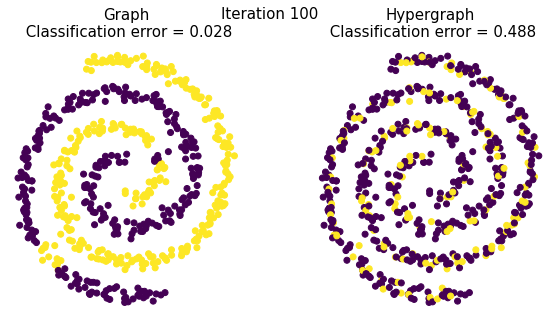

In [12]:
k = 5
target_iternum = 100
titlestring = 'blah'

fig_binary, ax_binary = plt.subplots(nrows=1, ncols=2,figsize=(10, 5))

data_generation, problem_kind  = (generate_spirals,' Spirals')
    
graph_x_out, hypergraph_x_out, data_matrix = compare_estimated_labels('diffusion',data_generation,k,target_iternum,titlestring=None, diffusion_step_size=1)

for idx,(x,titlestring) in enumerate([(graph_x_out,'Graph'), (hypergraph_x_out,'Hypergraph')]):
    plot_label_comparison_binary(ax_binary[idx],x, data_matrix,titlestring)

plt.suptitle(f'Iteration {target_iternum}', fontsize = 15)    
plt.show()

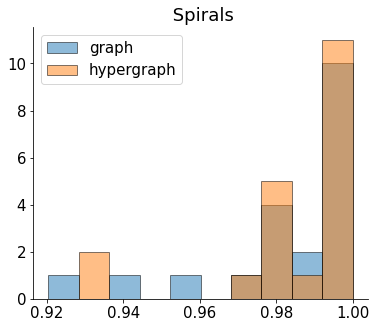

In [10]:
fig, ax = plt.subplots(figsize = (6, 5))
AUC_vals = []
num_trials = 20

# generate dummy data to extract default n value
_,data_matrix = data_generation(verbose=False)
n = data_matrix.shape[0]
labels = np.hstack([np.full(shape=int(n/2),fill_value = -1),np.full(shape=int(n/2),fill_value = 1)])

for trial in range(num_trials):
    # cluster via PPR computation
    graph_x_out, hypergraph_x_out, data_matrix = compare_estimated_labels('PPR',data_generation,k,target_iternum,titlestring=None, diffusion_step_size=1)
    graph_auc_score = metrics.roc_auc_score(labels, graph_x_out)
    hypergraph_auc_score = metrics.roc_auc_score(labels, hypergraph_x_out)

    AUC_vals.append((hypergraph_auc_score, graph_auc_score))
final_plot_AUC_hist(AUC_vals, ax = ax, decorated = True, titlestring = problem_kind )